

> 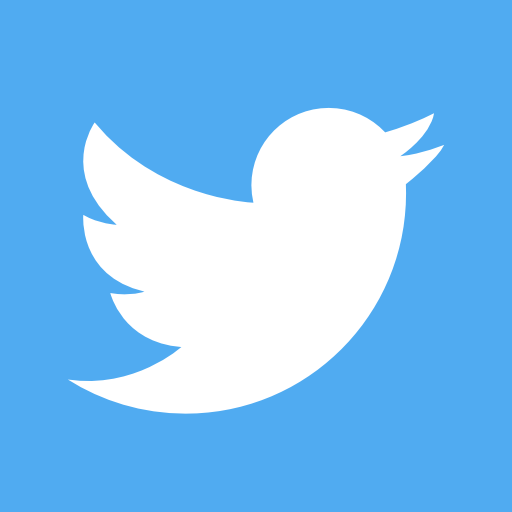



# Twitter Sentiment Analysis - Machine Learning VS. Deep Learning


A part from source code is from JosephAssaker's Github. 
https://github.com/JosephAssaker/Twitter-Sentiment-Analysis-Classical-Approach-VS-Deep-Learning/blob/master/Twitter%20Sentiment%20Analysis%20-%20Classical%20Approach%20VS%20Deep%20Learning.ipynb

# Introduction

# Why do we conduct sentiment analysis? 

Based on Wikipedia's definition, Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. 

NLP is very powerful, and there are several examples to demonstrate how NLP is used in our life. 

# 1. Email filters
NLP can uncover certain words or phrases that signal a spam message. 

# 2. Voice assistance and vitual assistants.
The most common being Apple’s Siri and Amazon’s Alexa, virtual assistants use NLP machine learning technology to understand and automatically process voice requests. 

# 3. Predictive text

Every time you type a text on your smartphone, you see NLP in action. You often only have to type a few letters of a word, and the texting app will suggest the correct one for you. 

When we are using google email,it can also automaticallly generate text and responding messages for us. 

Predictive text, autocorrect, and autocomplete have become so accurate in word processing programs, like MS Word and Google Docs, that they can make us feel like we need to go back to grammar school.

# 4. Monitor brand sentiment on social media

Sentiment analysis is the automated process of classifying opinions in a text as positive, negative, or neutral. It’s often used to monitor sentiments on social media. You can track and analyze sentiment in comments about your overall brand, a product, particular feature, or compare your brand to your competition.

For businesses, tracking and solving negative reviews are urgent and important.
By tracking sentiment analysis, you can spot these negative comments right away and respond immediately.


# 5. Quickly sorting customer feedback
Text classification is a core NLP task that assigns predefined categories (tags) to a text, based on its content. It’s great for organizing qualitative feedback (product reviews, social media conversations, surveys, etc.) into appropriate subjects or department categories.

# 6. Chatbots
A chatbot is a computer program that simulates human conversation. Chatbots use NLP to recognize the intent behind a sentence, identify relevant topics and keywords, even emotions, and come up with the best response based on their interpretation of data.

# 7. Machine translation
The possibility of translating text and speech to different languages has always been one of the main interests in the NLP field. 
Google Translate, Microsoft Translator, and Facebook Translation App are a few of the leading platforms for generic machine translation. In August 2019, Facebook AI English-to-German machine translation model received first place in the contest held by the Conference of Machine Learning (WMT). The translations obtained by this model were defined by the organizers as “superhuman” and considered highly superior to the ones performed by human experts.

NLP has permeated in every part of our lives. No matter if we use Siri, GMAIL, make a phone call to the service center or text to our friends, NLP is everywhere. 

This project's aim is to explore the world of Natural Language Processing (NLP) by building what is known as a Sentiment Analysis Model. A sentiment analysis model is a model that analyses a given piece of text and predicts whether this piece of text expresses positive or negative sentiment.

It is like a real case demonstrated for the fourth example we mentioned before. By analyzing tons of users' tweets and leveraging the help of ML/AI, we can quickly classify the users' sentiments, and to further observe the public's attitudes and suggestions for certain events.  

How powerful it is! Let's start it! 

# 1. Importing and Discovering the Dataset


In [1]:
from time import time
import random
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset with no columns titles and with latin encoding 
df_raw = pd.read_csv('sentiment140.csv', encoding = "ISO-8859-1",header=None)

In [3]:
 # As the data has no column titles, we will add our own
df_raw.columns = ["label", "time", "date", "query", "username", "text"]

In [4]:
df_raw

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
df_raw['label'].value_counts()
#  The label '4' denotes positive sentiment and '0' denotes negative sentiment


4    800000
0    800000
Name: label, dtype: int64

In [6]:
# Ommiting every column except for the text and the label, as we won't need any of the other information
# We only want to focus on text and label two variables
df = df_raw[['label', 'text']]
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [7]:
# Seperating positive and negative rows
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [8]:
# Only retaining 1/4th of our data from each output group
# Feel free to alter the dividing factor depending on your workspace
# 1/64 is a good place to start if you're unsure about your machine's power
df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


In [9]:
# Concatinating both positive and negative groups and storing them back into a single dataframe
df = pd.concat([df_pos, df_neg])
len(df)

400000

# 2. Cleaning and Processing the Data


# 2.1. Tokenization
In order to feed our text data to a classification model, we first need to tokenize it.
Tokenization is the process of splitting up a single string of text into a list of individual words, or tokens.

Python has a built in string method: string.split(), that splits up any given string into a list based on a splitting character (if not specified, will default to white space).

In this example, we will use the TweetTokenizer; a Twitter-aware tokenizer provided by the nltk library. In addition to a standard tokenizer, this tokenizer will split the input text based on various criterions that are well suited for the tweets use case.

In [10]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer(reduce_len=True)


In [11]:
X = df['text']

In [12]:
Y = df['label']

In [13]:
data=[]
for x, y in zip(X, Y):
    if y == 4:
        # we recode positive as 1, negative as 0
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))

In [14]:
data

[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  1),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 1),
 (['@ProductOfFear',
   'You',
   'can',
   'tell',
   'him',
   'tha

# 2.2. Lemmatization


According to the Cambridge English Dictionary, Lemmatization is the process of reducing the different forms of a word to one single form, for example, reducing "builds", "building", or "built" to the lemma "build". This will greatly help our classifier by treating all variants of a given word as being references to the original lemma word. For example, it will avoid interpreting "running" and "run" as completely different inputs.

In this example, we will use nltk's WordNetLemmatizer to accomplish this task. This lemmatizer however takes as input two arguments: a list of tokens to be lemmatized as well as their corresponding part of speech. The most common parts of speech in english are nouns and verbs. In order to extract each token's part of speech, we will utilize nltk's post_tag function, that takes an input a list of tokens, and returns a list of tuples, where each tuple is composed of a token and its corresponding position tag. Various position tags can be outputted from the pos_tag function, however the most notable ones are:

NNP: Noun, proper, singular
    
NN: Noun, common, singular or mass.
    
VBG: Verb, gerund or present participle.
    
VBN: Verb, past participle.

VBP	verb, present tense not 3rd person singular(wrap)

VBZ	verb, present tense with 3rd person singular (bases)

WDT	wh-determiner (that, what)

WP	wh- pronoun (who)

WRB	wh- adverb (how)

In [15]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [17]:
# Previewing the pos_tag() output
print(pos_tag(data[0][0]))

[('I', 'PRP'), ('LOVE', 'VBP'), ('@Health4UandPets', 'NNS'), ('u', 'JJ'), ('guys', 'NNS'), ('r', 'VBP'), ('the', 'DT'), ('best', 'JJS'), ('!', '.'), ('!', '.')]


In [18]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
lemmatizer = WordNetLemmatizer()
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in data[0][0]])
print(lemmatized_output)


I LOVE @Health4UandPets u guy r the best ! !


# 2.3. Cleaning the Data


In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
import re, string
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

In [22]:
# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words.
#       Including many minimally present cases would negatively impact the performance. 
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

In [23]:
# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[\w]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))


['love', 'guy', 'best']


In [24]:
# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that transforms our data into the required input structure
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

In [25]:
cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

In [26]:
cleaned_tokens_list

[(['love', 'guy', 'best'], 1),
 (['meet', 'one', 'besties', 'tonight', 'cant', 'wait', 'girl', 'talk'], 1),
 (['thanks',
   'twitter',
   'add',
   'sunisa',
   'get',
   'meet',
   'hin',
   'show',
   'area',
   'sweetheart'],
  1),
 (['sick',
   'really',
   'cheap',
   'hurt',
   'much',
   'eat',
   'real',
   'food',
   'plus',
   'friend',
   'make',
   'soup'],
  1),
 (['effect', 'everyone'], 1),
 (['tell',
   'burst',
   'laugh',
   'really',
   'loud',
   'thanks',
   'make',
   'come',
   'sulk'],
  1),
 (['thans', 'response', 'ihad', 'already', 'find', 'answer'], 1),
 (['jealous',
   'hope',
   'great',
   'time',
   'vega',
   'like',
   "acm's",
   'love',
   'show'],
  1),
 (['congrats', 'fletcher', 'finally', 'join', 'twitter'], 1),
 (['responded', 'stupid', 'cat', 'help', 'type', 'forgive', 'error'], 1),
 (['crazy',
   'day',
   'school',
   'hour',
   'straiiight',
   'watch',
   'hill',
   'tell',
   'happy',
   'birthday'],
  1),
 (['forget', 'two', 'half', 'men', '

In [27]:
final_data = []

# Transforming the data to fit the input structure of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))

# 3. Visualizing the Data


Word Clouds are one of the best visualizations for words frequencies in text documents.

In [28]:
# regroup two groups
# positive/negative 
from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

Positive words


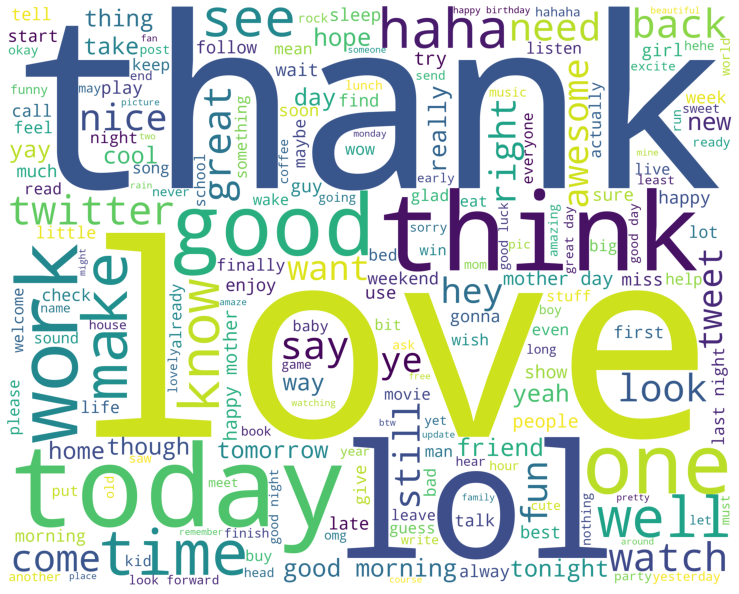

Negative words


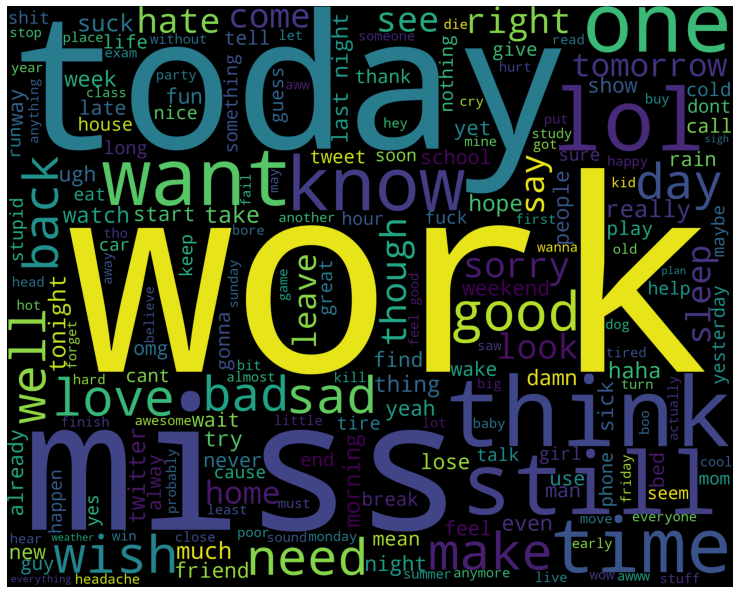

In [29]:
# Defining our word cloud drawing function
def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(positive_words, 'white')
print("Negative words")
wordcloud_draw(negative_words)        


We can see that \"love\",  \"thank\", "lol" have higher chance of appearing in the positive tweets. 
In the negative tweets, we can see "work", "today", "miss", "lol" have larger font size.


# 4. Naive Bayesian Model- Base Model


Naive Bayesian classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but rather a family of algorithms where all of them make the following naive assumptions:

All features are independent from each other.
Every feature contributes equally to the output.

Naive Bayes are mostly used in natural language processing (NLP) problems. Naive Bayes predict the tag of a text. They calculate the probability of each tag for a given text and then output the tag with the highest one. 

It is a very simple model, but sometimes it can be more powerful than complicated ML algorithmn and deep learning model.

Bayes theorem calculates probability P(c|x) where c is the class of the possible outcomes and x is the given instance which has to be classified, representing some certain features.
P(c|x) = P(x|c) * P(c) / P(x)


In our case, these two assumptions can be interpreted as:

Each word is independent from the other words, no relation between any two words of a given sentence.
Each word contributes equally, throughout all sentences, to the decision of our model, regardless of its relative position in the sentence.

Example: "This is bad" / "This is very bad" or "Such a kind person" / "This kind of chocolate is disgusting", in both cases the Naive Bayesian classifier would give the same importance for the words 'bad' and 'kind', albeit them having a stronger meaning and a different meaning respectively in first and second sentences.



Nevertheless, Naive Bayesian are widely used in NLP and they often output great results.



In our case, this can be intuitively interpreted as the probability of a tweet being positive, based on prior knowledge of the words inside the input text. In a nutshell, this probability is: the probability of the first word occuring in a positive tweet, times, the probability of the second word occuring in a positive tweet, ..., times, the probability of a tweet being positive.

# 4.1. Splitting the Data


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
final_data

[({'best': True, 'guy': True, 'love': True}, 1),
 ({'besties': True,
   'cant': True,
   'girl': True,
   'meet': True,
   'one': True,
   'talk': True,
   'tonight': True,
   'wait': True},
  1),
 ({'add': True,
   'area': True,
   'get': True,
   'hin': True,
   'meet': True,
   'show': True,
   'sunisa': True,
   'sweetheart': True,
   'thanks': True,
   'twitter': True},
  1),
 ({'cheap': True,
   'eat': True,
   'food': True,
   'friend': True,
   'hurt': True,
   'make': True,
   'much': True,
   'plus': True,
   'real': True,
   'really': True,
   'sick': True,
   'soup': True},
  1),
 ({'effect': True, 'everyone': True}, 1),
 ({'burst': True,
   'come': True,
   'laugh': True,
   'loud': True,
   'make': True,
   'really': True,
   'sulk': True,
   'tell': True,
   'thanks': True},
  1),
 ({'already': True,
   'answer': True,
   'find': True,
   'ihad': True,
   'response': True,
   'thans': True},
  1),
 ({"acm's": True,
   'great': True,
   'hope': True,
   'jealous': True,
 

In [32]:
# As our data is currently ordered by label, we have to shuffle it before splitting it
# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(140).shuffle(final_data)

# Here we decided to split our data as 90% train data and 10% test data
# Once again, feel free to alter this number and test the model accuracy
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]


In [33]:
train_data

[({'beat': True,
   "he's": True,
   'home': True,
   'know': True,
   'laugh': True,
   'mat': True,
   'mate': True,
   'still': True,
   'swamp': True},
  1),
 ({'...': True,
   'bah': True,
   'borning': True,
   'bung': True,
   'cold': True,
   'eye': True,
   'squinty': True,
   'thats': True,
   'virus': True},
  0),
 ({'day': True,
   'fricken': True,
   'haha': True,
   'help': True,
   'hot': True,
   'jeep': True,
   'need': True,
   'probably': True,
   'take': True,
   'today': True,
   'top': True,
   'wish': True,
   'yesterday': True},
  0),
 ({'bed': True, 'big': True, 'hangover': True, 'lie': True}, 0),
 ({'cause': True, 'joemac': True, 'sing': True, "th'as": True}, 1),
 ({'miss': True}, 0),
 ({'mine': True, 'miss': True}, 0),
 ({'well': True, 'yay': True}, 1),
 ({'away': True,
   'bunch': True,
   'doof': True,
   'elephant': True,
   'herd': True,
   'like': True,
   'mouse': True,
   'music': True,
   'painful': True,
   'run': True,
   'street': True,
   'thump':

Your data should now be structured like a dictionary in order to use NaiveBayesClassifier.


# 4.2. Training the Model


Now it's time to train our model on our training data.

In this notebook, we will utilize nltk's NaiveBayesClassifier.

How can I choose NaiveBayes packages in Python? NLTK and Sciktlearn both can implement this algorithm.

Gaussian Naive Bayes （GaussianNB）

Multinomial Naive Bayes (Multinomial classification suits best for the discrete values like word counts.)

Sciktlearn has GaussianNB for continuous valued features that are assumed to be independently Gaussian distributed.

MultinomialNB is for data with integer valued input features that are assumed to be multinomial distributed.

NaiveBayesClassifier in the nltk package is usually used for text classification. This is the reason why we chose this package first. Experiment and testing are important methods when we are selecting an ML algorithm, and I will also test other frequently used methods. 

In [34]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

In [35]:
# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

Accuracy on train data: 0.8107888888888889
Accuracy on test data: 0.755725


In [36]:
# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
# This is the power of NaiveBayesClassifier in nltk.
print(classifier.show_most_informative_features(20))

Most Informative Features
               depressed = True                0 : 1      =     49.0 : 1.0
               toothache = True                0 : 1      =     45.0 : 1.0
                    roni = True                0 : 1      =     34.3 : 1.0
                 unhappy = True                0 : 1      =     31.4 : 1.0
                   strep = True                0 : 1      =     31.0 : 1.0
                  asthma = True                0 : 1      =     26.3 : 1.0
                 unloved = True                0 : 1      =     25.0 : 1.0
                  #movie = True                1 : 0      =     23.0 : 1.0
                  gutted = True                0 : 1      =     22.3 : 1.0
                   hates = True                0 : 1      =     21.9 : 1.0
               heartburn = True                0 : 1      =     21.7 : 1.0
                     bom = True                1 : 0      =     21.4 : 1.0
                   ugggh = True                0 : 1      =     19.7 : 1.0

Wow, a 75.5% accuracy on the test set training a very Naive (😉) algorithm.

Taking a look at the 20 most informative features of the model, we can notice the high volume of negative to positive (0:1) informative features. This is very interesting as it means that negative tweets have a much more concentrated and limited vocabulary when compared to positive tweets.

I personally interpret this as follows: Whenever people are in a bad mood, they are confined in such a limited space of words and creativity, in contrast with when they are in a happy mood.

In [37]:
# Now that our classifier is built, we can have fun and test it with custom tweets!
custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))
0


0


0

In [38]:
custom_tweet = "Today's weather is really awful"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

0


In [39]:
custom_tweet = "I like this movie"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


Nevertheless, this model has various shortcomings.

As the model only evaluates sentences at an independent word level, it performs very poorly when it comes to negations and other multi-words constructs. For example, is the model gets the following input: The concert was good!, it would simply take each individual word (here, and after cleaning the input, \"concert\" and \"good\") and calculate each word's probability to be either positive and negative and finally multiply everything together. Thus, we would expect the model to perform poorly on examples such: The concert was not good! or I'm not very happy :(.

In [40]:
custom_tweet = "Not good"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [41]:
custom_tweet = "I am not very happy"

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


Naive bayes model isn't robust against negations and sarcastic sentences. However, in the most simple and regular sentences, it still works very well.


# I want to try MultinomialNB in scikit learn to see how it performs.

In [42]:
# We need to reformat the data.  
df1 = pd.DataFrame(data=cleaned_tokens_list)
df1.columns=['text','target']
df1

,text,target
0,"[love, guy, best]",1
1,"[meet, one, besties, tonight, cant, wait, girl...",1
2,"[thanks, twitter, add, sunisa, get, meet, hin,...",1
3,"[sick, really, cheap, hurt, much, eat, real, f...",1
4,"[effect, everyone]",1
...,...,...
399995,"[feel, good]",0
399996,"[work, ...]",0
399997,"[common, crash, find, delete, process, eating,...",0
399998,"[baby, boy, wear, big, boy, underwear]",0


In [43]:
df1['text']

0                                         [love, guy, best]
1         [meet, one, besties, tonight, cant, wait, girl...
2         [thanks, twitter, add, sunisa, get, meet, hin,...
3         [sick, really, cheap, hurt, much, eat, real, f...
4                                        [effect, everyone]
                                ...                        
399995                                         [feel, good]
399996                                          [work, ...]
399997    [common, crash, find, delete, process, eating,...
399998               [baby, boy, wear, big, boy, underwear]
399999                        [fml, forget, phone, charger]
Name: text, Length: 400000, dtype: object

In [44]:
df1['text'] = df1['text'].apply(lambda x: ', '.join([str(i) for i in x]))


In [45]:
df1

,text,target
0,"love, guy, best",1
1,"meet, one, besties, tonight, cant, wait, girl,...",1
2,"thanks, twitter, add, sunisa, get, meet, hin, ...",1
3,"sick, really, cheap, hurt, much, eat, real, fo...",1
4,"effect, everyone",1
...,...,...
399995,"feel, good",0
399996,"work, ...",0
399997,"common, crash, find, delete, process, eating, ...",0
399998,"baby, boy, wear, big, boy, underwear",0


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['text'],df1['target'],test_size=0.1)


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#Train and evaluate the model
#### count_vect = CountVectorizer()
### we should separate this procedure
### Because we've fitted a vectorizer, and we shouldn't throw it away.
# Later when we transform test data, we can use it directly
count_vect = CountVectorizer()
X_train_vectorized = count_vect.fit_transform(X_train)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vectorized)


In [48]:
# fit and transform 
# use count_vect directly
X_test_vectorized = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_vectorized)

clfrNB = MultinomialNB()
clfrNB.fit(X_train_tfidf, y_train)
preds = clfrNB.predict(X_test_tfidf)
score = roc_auc_score(y_test, preds)
print(score)

0.7522564926371205


When we use MultinomialNB in the scikit learn package, we can see the accuracy result is very similar to the NaiveBayesClassifier. 

# 4.3. Asserting the Model

In [49]:
# Finally, let's further assert our model by plotting the AUC and the confusion matrix of the model.


In [50]:
from sklearn import metrics

# Storing all desired values in a list
y = [test_data[i][1] for i in range(len(test_data))]
# Storing all probabilities of having a positive sentiment in a list
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

# Making sure both values a re equal
print(len(y), len(probs))

# performing the roc curve calculations
fpr, tpr, thresholds = metrics.roc_curve(y, probs)

# Printing the Area Under Curve (AUC) of the ROC curve (the closer to 1, the better)
auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

40000 40000
AUC: 0.834


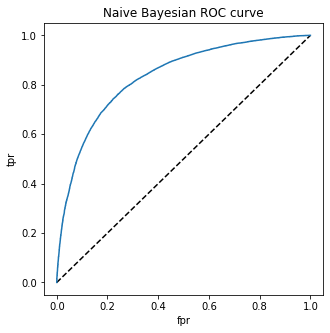

In [51]:
# Plotting the ROC Curve
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [52]:
# Creating a confusion matrix (this specific confusion matrix function accepts numpy arrays rather than python lists)

probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,16528,3452,19980
1,6319,13701,20020
All,22847,17153,40000


# 6. Deep Learning Model - LSTM

Deep Learning is a very rapidly growing field, that is proving to be extremely beneficial in various scenarios. One of those scenarios, which we will be studying in this notebook, is the ability to process text data in a much more complex and powerful manner. In fact, in the next section of the notebook we will be focusing on implementing a Deep Learning model that will successfully tackle and solve the above mentioned shortcomings of the Naive Bayes model, such as the lack of relationship between words in a sentence and the poor generalization on previously unseen data.



A Long Short-Term Memory, or LSTM, is a type of machine learning neural networks. More specifically, it belongs to the family of Recurrent Neural Networds (RNN) in Deep Learning, which are specifically conceived in order to process temporal data. Temporal data is defined as data that is highly influenced by the order that it is presented in. This means that data coming before or after a given datum (singular for data) can greatly affect this datum. Text data is an example of temporal data. For example, let's consider the following sentence:



Jane is not very happy. She's still mad at you!

In the above sentence, the word not greatly influences the meaning of the upcoming words very happy. Also, we used the word she as we are speaking about a female subject.

Also, here's a fun example conveying the influence of words' positions directly influencing a sentence's meaning:

Are you as clever as I am?

Am I as clever as you are?

LSTM is an advanced and complex deep learning architecture.
I used LSTM(Long Term Short Memory) because it handles long sequence dependencies well.


That being said, you don't really need to know the ins and outs of LSTM in order to walk through the rest of this notebook, so don't worry about it for the moment!

# 5.1. Data Pre-processing


In order to feed our text data to our LSTM model, we'll have to go through several extra preprocessing steps.

Most neural networks expect numbers as inputs. Thus, we'll have to convert our text data to numerical data.

One way of doing so would be the following: collect all possible words in our dataset and generate a dictionary containing all unique words in our text corpus, then sort all of these words alphabetically and assign to each word an index. So for example, let's say our dictionary's length turned out to be 100,000 words. The word "a" would be assigned the index 0, the word "aaron" would be assigned the index 1, and so on, until we reach the last word in our dictionary, say "zulu", and assign to it the index 99,999. Great! Now each word is represented with a numerical value, and we can feed the numerical value of each word to our model.

It turns out that this step alone is not enough to be able to train good Deep Learning models. If you think about it, when the model reads an input 20,560 and then another input 20,561 for example, it would assume that these values are "close". However, those inputs could be the indexes of totally unrelated words, such as "cocktail" and "code", appearing right next to each other in the sorted dictionary. Hoping I've convinced you with this example, and that you hopefully believe that "cocktail" and "code" are, and should always be, completely unrelated, let's take a look at one solution that is widely adopted in various NLP implementations.

## 5.1.1. Word Embeddings


Word embeddings are basically a way for us to convert words to representational vectors. What I mean by this is that, instead of mapping each word to an index, we want to map each word to a vector of real numbers, representing this word.

The goal here is to be able to generate similar or close representational vectors for words that have similar meaning. For example, when feeding the words "excited" and "thrilled" to the word embedding model, we would like the model to output "close" representations for both words. Whereas if we feed the words "excited" and "Java", we would like the model to output "far" representations for both words.

The concept of "close" and "far" vectors is actually implemented using the cosine similarity. In fact, word embeddings and distance between words or relation between words is an immense discussion in its own. So I'll just keep my explanation to a minimum in this notebook.

## 5.1.2. Global Vectors for Word Representation (GloVe)


Building and training good word embeddings is a tremendous process requiring millions of data samples and exceptional computational power. Luckily for us, folks at the University of Stanford already did this for us and published their results for free on their official website! Their model is called GloVe, and it's going to be what we'll use in the next steps



In [53]:
# Downloading and unzipping the glove word embeddings from the official website

!wget http://nlp.stanford.edu/data/glove.6B.zip


--2021-12-07 14:44:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-12-07 14:44:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-12-07 14:44:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [54]:
!unzip glove*.zip


Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [55]:
# Defining a handy function in order to load a given glove file
# What we are doing right now is to write a function to read the contents of the GloVe Vector. 

def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [56]:
# Loading the 50-dimensional GloVe embeddings
# This method will return three dictionaries:
# * word_to_index: a dictionary mapping from words to their indices in the vocabulary
# * index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary
# * word_to_vec_map: dictionary mapping words to their GloVe vector representation
# Note that there are 400,001 words, with the valid indices ranging from 0 to 400,000
import numpy as  np
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')


In [57]:
word_to_index['hello']

176468

In [58]:
word_to_vec_map['hello']


array([-0.38497 ,  0.80092 ,  0.064106, -0.28355 , -0.026759, -0.34532 ,
       -0.64253 , -0.11729 , -0.33257 ,  0.55243 , -0.087813,  0.9035  ,
        0.47102 ,  0.56657 ,  0.6985  , -0.35229 , -0.86542 ,  0.90573 ,
        0.03576 , -0.071705, -0.12327 ,  0.54923 ,  0.47005 ,  0.35572 ,
        1.2611  , -0.67581 , -0.94983 ,  0.68666 ,  0.3871  , -1.3492  ,
        0.63512 ,  0.46416 , -0.48814 ,  0.83827 , -0.9246  , -0.33722 ,
        0.53741 , -1.0616  , -0.081403, -0.67111 ,  0.30923 , -0.3923  ,
       -0.55002 , -0.68827 ,  0.58049 , -0.11626 ,  0.013139, -0.57654 ,
        0.048833,  0.67204 ])

In [59]:
word_to_index['unk']


372306

Below is a short example of the usage of the cosine similarity in order to find correlations in the data.

We can observe that the words cucumber and tomato are highly positively similar. Whereas the words cucumber and phone are not related at all, having a close to 0 similarity measure.

Note that the cosine similarity return values between -1 and +1, where -1 denote completely opposite meanings, +1 denote completely identical meanings and 0 denote totally unrelated meanings.

In [60]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

In [61]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['tomato'])


0.8632714714841137

In [62]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['phone'])


-0.012485506721235957

## 5.1.3. Data Padding


Further in our training we would like to speed the process up by splitting data into mini-batches. Batch learning is basically the process of training on several examples at the same time, which greatly decreases the training time!

However, and in order to be able to utilize batch learning, keras (and similarly to most machine learning frameworks) requires all data within the same batch to have the same length or dimension. Whereas in our text data, each example could have a variable sentence length. In order to overcome this issue, we will go over all of our data, and calculate the length of the longest phrase (in terms of words). Then, we will 0-pad all of the data sequences so that they will all have the same max_len calculated.

Let's consider a max_len of 5 words, and the two sentences 

I love you 

and I will be ready. 

First, we will convert these sentences to their corresponding index representation, then 0-pad them for the max_len 5. After we've done that, we can now feed the resulting lists into a word embedding layer in order to get the representational vectors for each index (representing a given word).

# 5.2. Data Transformation


In [63]:
unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

In [64]:
# cleaned_tokens_list is what we generated before. 

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

max_len: 25


In [65]:
X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))


In [66]:
for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    

In [67]:
X

array([[226278., 169725.,  74390., ...,      0.,      0.,      0.],
       [239785., 269953., 372306., ...,      0.,      0.,      0.],
       [357161., 368306.,  46173., ...,      0.,      0.,      0.],
       ...,
       [105990., 111265., 148427., ...,      0.,      0.,      0.],
       [ 65526.,  82265., 384428., ...,      0.,      0.,      0.],
       [150703., 151654., 283483., ...,      0.,      0.,      0.]])

In [68]:
Y

array([1., 1., 1., ..., 0., 0., 0.])

# 5.3. Building the Model

In [69]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [70]:
# Defining a function that will initialize and populate our embedding layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [71]:
# Defining a sequencial model composed of firstly the embedding layer, than a pair of Bidirectional LSTMs,
# that finally feed into a sigmoid layer that generates our desired output betwene 0 and 1.

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            20000050  
                                                                 
 bidirectional (Bidirectiona  (None, 25, 256)          183296    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [72]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)


# 5.4. Training the Model


In [74]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)


Epoch 1/20
2500/2500 [==============================] - 124s 46ms/step - loss: 0.5536 - accuracy: 0.7107 - val_loss: 0.5160 - val_accuracy: 0.7415
Epoch 2/20
2500/2500 [==============================] - 92s 37ms/step - loss: 0.5079 - accuracy: 0.7456 - val_loss: 0.4994 - val_accuracy: 0.7541
Epoch 3/20
2500/2500 [==============================] - 110s 44ms/step - loss: 0.4868 - accuracy: 0.7605 - val_loss: 0.4894 - val_accuracy: 0.7613
Epoch 4/20
2500/2500 [==============================] - 91s 36ms/step - loss: 0.4683 - accuracy: 0.7721 - val_loss: 0.4867 - val_accuracy: 0.7625
Epoch 5/20
2500/2500 [==============================] - 108s 43ms/step - loss: 0.4501 - accuracy: 0.7831 - val_loss: 0.4803 - val_accuracy: 0.7694
Epoch 6/20
2500/2500 [==============================] - 91s 36ms/step - loss: 0.4288 - accuracy: 0.7961 - val_loss: 0.4905 - val_accuracy: 0.7631
Epoch 7/20
2500/2500 [==============================] - 107s 43ms/step - loss: 0.4030 - accuracy: 0.8104 - val_loss: 0.50

In [75]:
# Defnining a handy function in order to plot various models accuracy and loss progress

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

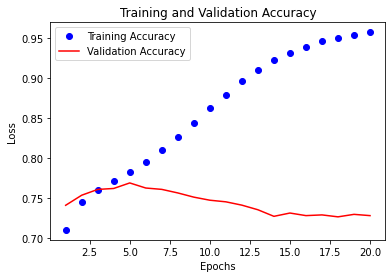

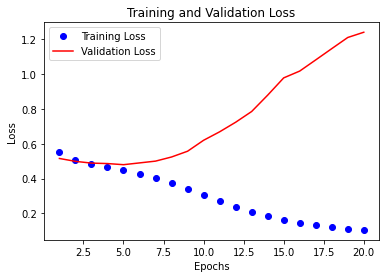

In [76]:
# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)

The training accuracy is sky-rocketing, exceeding 95% after 20 epochs! However, the validation accuracy increased slightly in the early epochs, reaching 76.6% on the 6th epoch, after which it experienced a consistently gradual decrease. In data science, we would classify this model as having very high variance and low bias. This is also referred to as "over-fitting".

Over-Fitting is basically the phenomenon where the model's performance on validation data starts degrading, while still achieving great progress on the test set. In other words, the model is doing exceptionally well on learning specific examples it has been trained on, but is failing to generalize to data it never saw in its training phase.

# 5.5. Investigating Possibilties to Improve the Model


**Regularization** is the process of preventing a model from over-fitting the training data. You can conceptualize regularization as being a tool we use in order to render our model less sensible to every detail, and possibly outliers, in the training data. This should allow the model to better generalize and have a better performance on the validation data, or any data it wasn't trained on.



**Dropout** is one of the many regularization techniques, and also one of the simplest to implement and most commonly used. Basically, what dropout does is that it randomly eliminates several (based on a parametrized percentage rate) neurons connections in the network, rendering the model less complex, and forcing the model to only look at part of a given example. The random elimination of connections in the model is repeated randomly for each example training data.



Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from overfitting”, JMLR 2014
For example, let's consider the following sentences, with a dropout layer with a rate of 0.5 (50% of connections will be eliminated):

"Another kind of regularization can be directly applied to the cost function"

"This is my first ever notebook. Hope you're enjoying it so far!"

The output of the dropout layer could look like the following:

"kind of regularization be to function"

"This my notebook. you enjoying it far!"

Thus, the model will only have information on a part of the input example, and should be able to escape over-fitting particular characteristics of the training data.

# Model Building - Dropout


In [77]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            20000050  
                                                                 
 dropout (Dropout)           (None, 25, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 25, 256)          183296    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 25, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2

In [78]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [79]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)


Epoch 1/20
2500/2500 [==============================] - 117s 45ms/step - loss: 0.5961 - accuracy: 0.6739 - val_loss: 0.5403 - val_accuracy: 0.7219
Epoch 2/20
2500/2500 [==============================] - 106s 42ms/step - loss: 0.5629 - accuracy: 0.7036 - val_loss: 0.5240 - val_accuracy: 0.7380
Epoch 3/20
2500/2500 [==============================] - 102s 41ms/step - loss: 0.5496 - accuracy: 0.7135 - val_loss: 0.5099 - val_accuracy: 0.7462
Epoch 4/20
2500/2500 [==============================] - 91s 37ms/step - loss: 0.5411 - accuracy: 0.7203 - val_loss: 0.5060 - val_accuracy: 0.7457
Epoch 5/20
2500/2500 [==============================] - 90s 36ms/step - loss: 0.5337 - accuracy: 0.7256 - val_loss: 0.4974 - val_accuracy: 0.7543
Epoch 6/20
2500/2500 [==============================] - 91s 37ms/step - loss: 0.5268 - accuracy: 0.7315 - val_loss: 0.4954 - val_accuracy: 0.7569
Epoch 7/20
2500/2500 [==============================] - 100s 40ms/step - loss: 0.5233 - accuracy: 0.7333 - val_loss: 0.49

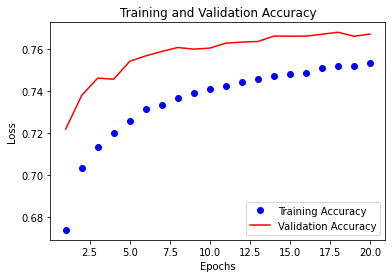

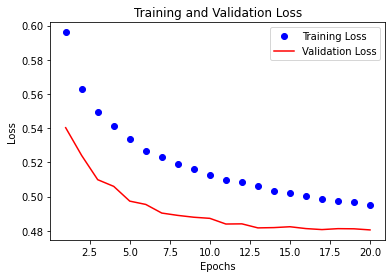

In [80]:
plot_acc_loss(model_dropout.history)


We can clearly see the effects of adding dropout layers on the training progress. The training accuracy is progressing at a much slower pace than it previously did. Nevertheless, the validation accuracy is steadily increasing, reaching 76.7%.



**5.5.2. Inspecting the Data - Unknown Words**

As explained earlier, whenever a word is not included in the words embedding mapping, it is referred to as an unknown word, or unk. Let's count the number of words that are being flagged as unknowns in our data.



In [81]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1
n_unk_words

199303

In [82]:
len(unks)


199303

In [83]:
len(UNKS)


227465

Let's investigate some of the most commonly occuring unknowns words in our data.



In [84]:
from collections import Counter
Counter(unks).most_common(50)

[("i'm", 32149),
 ("can't", 11369),
 ("i'l", 6283),
 ("that's", 5478),
 ("i've", 5085),
 ("he's", 1976),
 ("mother's", 1878),
 ("i'd", 1855),
 ('hahaha', 1722),
 ("we're", 1578),
 ("there's", 1425),
 ("what's", 1356),
 ("they're", 1179),
 ('lmao', 1104),
 ("we'l", 914),
 ("let's", 802),
 ('bday', 618),
 ('. .', 600),
 ('idk', 588),
 ("it'l", 587),
 ('hahah', 486),
 ('. . .', 481),
 ("how's", 440),
 ("who's", 378),
 ('#fb', 358),
 ('hahahaha', 356),
 ("mom's", 333),
 ('#asot40', 333),
 (":'(", 327),
 ("ain't", 317),
 ("y'al", 313),
 ("we've", 312),
 ('tweps', 312),
 (';-)', 307),
 ('thanx', 290),
 ('coky', 289),
 ('#folowfriday', 266),
 ("today's", 264),
 ('hehehe', 259),
 ('awh', 259),
 ("here's", 256),
 ("where's", 239),
 ('2morow', 235),
 ('urgh', 216),
 ('ahaha', 211),
 ("he'l", 197),
 ('b-day', 193),
 ('tomorow', 191),
 ("they'l", 191),
 ("ya'l", 187)]

We can observe that most of the unknown words are very common words, however the word embeddings layer does not support quotes. For example, if you try to get the index of the word "i'm", you'll be prompted with a key error, whereas the word "im" is available as a valid key. Other words, such as "idk", "lmao" or "b-day" reminds us that our data comes from twitter, and we'll have to individually handle each of these words such that our words embedding layer recognise them.



**Further data cleaning**

In [85]:
# A custom function defined in order to fine-tune the cleaning of the input text.
# This function is being "upgraded" such that it performs a more thourough cleaning of the data
# in order to better fit our words embedding layer
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow' or token == '2moro':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token == "mother's":
        return "mother"
    if token == "mom's":
        return "mom"
    if token == "dad's":
        return "dad"
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == '<3':
        return 'love'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token == 'goood':
        return 'good'
    if token in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return token


In [86]:
# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # Eliminating the token if it is a link
        token = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        cleaned_token = cleaned(token.lower())
        
        if cleaned_token == "idk":
            cleaned_tokens.append('i')
            cleaned_tokens.append('dont')
            cleaned_tokens.append('know')
            continue
        if cleaned_token == "i'll":
            cleaned_tokens.append('i')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "you'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "we'll":
            cleaned_tokens.append('we')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it'll":
            cleaned_tokens.append('it')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it's":
            cleaned_tokens.append('it')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i've":
            cleaned_tokens.append('i')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you've":
            cleaned_tokens.append('you')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "we've":
            cleaned_tokens.append('we')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "they've":
            cleaned_tokens.append('they')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you're":
            cleaned_tokens.append('you')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "we're":
            cleaned_tokens.append('we')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "they're":
            cleaned_tokens.append('they')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "let's":
            cleaned_tokens.append('let')
            cleaned_tokens.append('us')
            continue
        if cleaned_token == "she's":
            cleaned_tokens.append('she')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "he's":
            cleaned_tokens.append('he')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "that's":
            cleaned_tokens.append('that')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i'd":
            cleaned_tokens.append('i')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "you'd":
            cleaned_tokens.append('you')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "there's":
            cleaned_tokens.append('there')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "what's":
            cleaned_tokens.append('what')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "how's":
            cleaned_tokens.append('how')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "who's":
            cleaned_tokens.append('who')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "y'all" or cleaned_token == "ya'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('all')
            continue

        if cleaned_token.strip() and cleaned_token not in string.punctuation: 
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

In [87]:
data[0][0]

['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!']

In [88]:
# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

['i', 'love', 'you', 'guys', 'are', 'the', 'best']


Now let's re-compute our X and Y arrays according to the newly defined remove_noise function.



In [89]:
unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index


cleaned_tokens_list = []

In [90]:
# Removing noise from all the data, using the newly defined function
for tokens, label in data:
    x = remove_noise(tokens)
    if x:
        cleaned_tokens_list.append((x, label))



list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    


print(X[:5])
print(Y[:5])

max_len: 66
[[185457. 226278. 394475. 169754.  58997. 357266.  74390.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.]
 [187631. 239792. 373317. 388711. 269953. 268046. 254258. 372306. 361859.
   91041. 382320. 161844. 352214.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.

# Train Model Again- We use the dropout model just used. 

> Indented block



In [91]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 66, 50)            20000050  
                                                                 
 dropout (Dropout)           (None, 66, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 66, 256)          183296    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 66, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2

In [92]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)


In [94]:
len(X_train)


319360

In [95]:
len(X_test)


79841

In [96]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)


Epoch 1/20
2495/2495 [==============================] - 211s 82ms/step - loss: 0.5815 - accuracy: 0.6887 - val_loss: 0.5166 - val_accuracy: 0.7454
Epoch 2/20
2495/2495 [==============================] - 202s 81ms/step - loss: 0.5327 - accuracy: 0.7292 - val_loss: 0.4729 - val_accuracy: 0.7709
Epoch 3/20
2495/2495 [==============================] - 202s 81ms/step - loss: 0.5072 - accuracy: 0.7477 - val_loss: 0.4551 - val_accuracy: 0.7834
Epoch 4/20
2495/2495 [==============================] - 203s 82ms/step - loss: 0.4921 - accuracy: 0.7581 - val_loss: 0.4469 - val_accuracy: 0.7896
Epoch 5/20
2495/2495 [==============================] - 204s 82ms/step - loss: 0.4818 - accuracy: 0.7655 - val_loss: 0.4379 - val_accuracy: 0.7936
Epoch 6/20
2495/2495 [==============================] - 203s 81ms/step - loss: 0.4736 - accuracy: 0.7711 - val_loss: 0.4347 - val_accuracy: 0.7954
Epoch 7/20
2495/2495 [==============================] - 202s 81ms/step - loss: 0.4679 - accuracy: 0.7741 - val_loss: 0

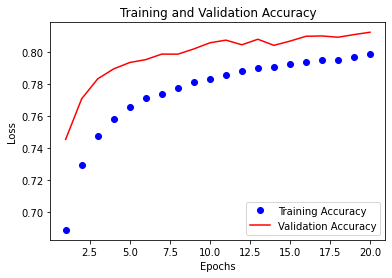

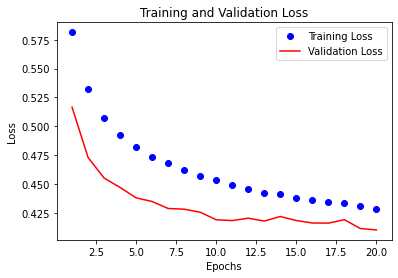

In [97]:
plot_acc_loss(model_dropout.history)


## We finally improved the model to nearly 81% of accuracy. 